# **Exploratory Data Analysis**
Let's take a look at the cleaned up data file prepared from the webscraped data from Glassdoor.

In [25]:
#load the .csv saved in the cleanup notebook into a dataframe
file = r"C:\Users\Tineash\Projects\Glassdoor_webscraper\Data\DA_data_cleaned_2.csv" #copy the file path between the double quotes
df = pd.read_csv(file)
df

,Job Title,Salary Minimum,Salary Maximum,Salary Average,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,Average Hourly Rate,City,State,Company Age (years),Title Grouping,Seniority Level
0,Data Analyst,97.00,135.00,116.000,3.6,KEYENCE,"Itasca, IL",5001 to 10000 Employees,1974,Company - Public,Machinery Manufacturing,Manufacturing,$5 to $10 million (USD),0,Itasca,IL,48,analyst,na
1,Data Analyst,58.24,93.60,76.960,3.3,State of Vermont,"Waterbury, VT",5001 to 10000 Employees,1791,Government,State & Regional Agencies,Government & Public Administration,Less than $1 million (USD),1,Waterbury,VT,231,analyst,na
2,Senior Data Analyst (Local or Remote),66.00,132.00,92.885,5.0,"Point Digital Finance, Inc.","Palo Alto, CA",201 to 500 Employees,2015,Company - Private,Real Estate,Real Estate,Unknown / Non-Applicable,0,Palo Alto,CA,7,analyst,senior
3,Data Analyst,174.00,174.00,174.100,3.6,Peraton,"Annapolis Junction, MD",10000+ Employees,2017,Company - Private,Information Technology Support Services,Information Technology,$5 to $10 billion (USD),0,Annapolis Junction,MD,5,analyst,na
4,Data Analyst,90.00,110.00,100.000,4.6,Store Space Self Storage,"Greenwood Village, CO",201 to 500 Employees,2017,Company - Private,Real Estate,Real Estate,Unknown / Non-Applicable,0,Greenwood Village,CO,5,analyst,na
5,Data Analyst,41.60,52.00,45.760,3.2,"Datrose, Inc","Owego, NY",201 to 500 Employees,1976,Company - Private,HR Consulting,Human Resources & Staffing,$10 to $25 million (USD),1,Owego,NY,46,analyst,na
6,Data Analyst,40.00,40.00,40.000,3.7,Apollo Retail,Remote,1001 to 5000 Employees,1992,Company - Private,Other Retail Stores,Retail & Wholesale,$50 to $100 million (USD),0,Remote,Remote,30,analyst,na
7,Jr. Data Analyst,48.00,98.00,68.406,3.7,Vdart Inc,"Plano, TX",1001 to 5000 Employees,2007,Company - Private,Information Technology Support Services,Information Technology,$50 to $100 million (USD),0,Plano,TX,15,analyst,junior
8,Data Analyst - Programmatic,60.00,80.00,70.000,4.0,Zeta Global,Remote,1001 to 5000 Employees,2007,Company - Public,Advertising & Public Relations,Media & Communication,$100 to $500 million (USD),0,Remote,Remote,15,analyst,na
9,Clinical Data Management Analyst (Remote),45.00,100.00,67.107,3.3,Merit Medical,"Rockland, MA",5001 to 10000 Employees,1987,Company - Public,Health Care Products Manufacturing,Manufacturing,$500 million to $1 billion (USD),0,Rockland,MA,35,analyst,na


In [26]:
#Let's remind ourselves what data attributes we have
df.columns

Index(['Job Title', 'Salary Minimum', 'Salary Maximum', 'Salary Average',
       'Rating', 'Company Name', 'Location', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Average Hourly Rate', 'City', 'State', 'Company Age (years)',
       'Title Grouping', 'Seniority Level'],
      dtype='object')

There are a few things I am interested in looking over at first glance. First, let's begin with the **continuous values**. Company age, converted salary, and rating could all use a quick glance. Let's also plot out a boxplot comparing the minimum and maximum salaries. 

<AxesSubplot:>

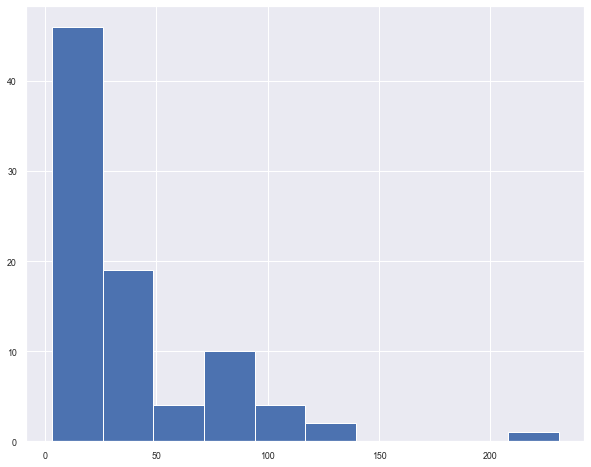

In [27]:
company_age_hist=df['Company Age (years)'].hist()
company_age_hist

<AxesSubplot:>

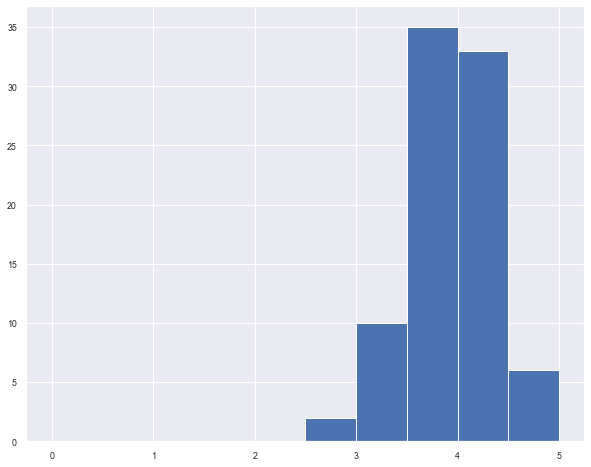

In [28]:
company_rating_hist=df['Rating'].hist(range=[0,5])
company_rating_hist

In [29]:
avg_salary_hist = df['Converted Salary'].hist()
avg_salary_hist

KeyError: 'Converted Salary'

<AxesSubplot:>

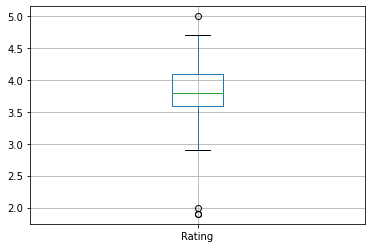

In [ ]:
rating_boxplot = df.boxplot(column = 'Rating')
rating_boxplot

<AxesSubplot:>

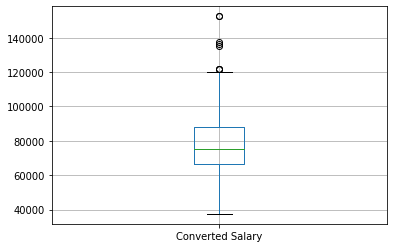

In [ ]:
avg_salary_boxplot = df.boxplot(column = 'Converted Salary')
avg_salary_boxplot


<AxesSubplot:>

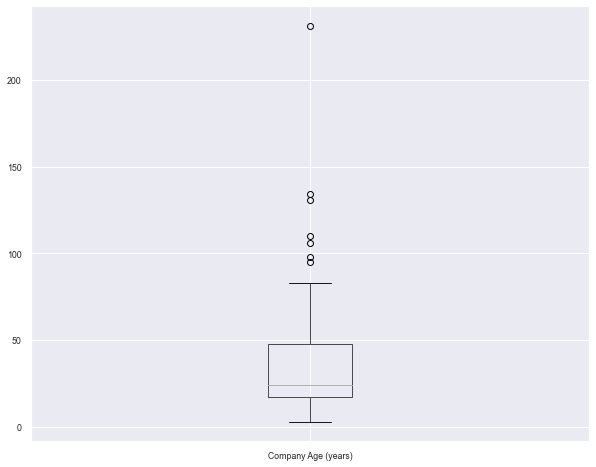

In [30]:
company_age_boxplot = df.boxplot(column = 'Company Age (years)')
company_age_boxplot

<AxesSubplot:>

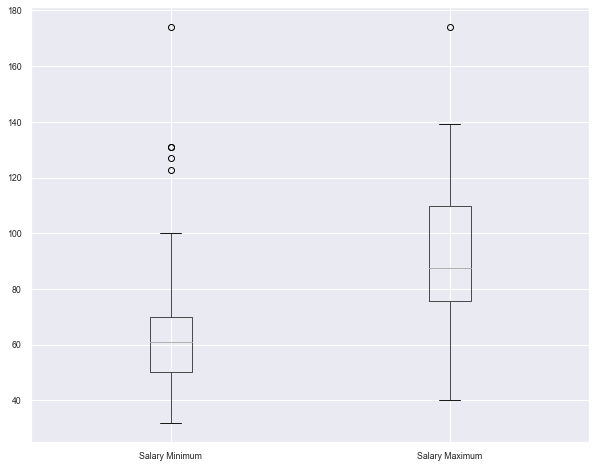

In [31]:
min_v_max_salary = df.boxplot(column = ['Salary Minimum', 'Salary Maximum'])
min_v_max_salary

This comparison tells us that the median salary minimum is in the upper $50k, the median salary maximum is in the mid $90k, and the bulk of the ranges are $50k-$80k for the minimum and $80k-110k for the maximum. It would be nice to include a median salary across all jobs to compare this field to all fields, but that will have to be at a different time. 

In [33]:
#Let's see if there are correlations between some continuous variables
df[['Company Age (years)', 'Rating', 'Salary Average']].corr() # get positive/negative coorelation between all variables listed

,Company Age (years),Rating,Salary Average
Company Age (years),1.000000,-0.267408,-0.138431
Rating,-0.267408,1.000000,0.178246
Salary Average,-0.138431,0.178246,1.000000


<AxesSubplot:>

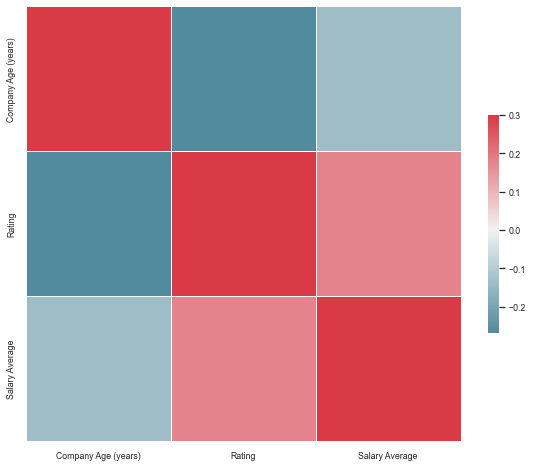

In [34]:
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(df[['Company Age (years)', 'Rating', 'Salary Average']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True,linewidths=.5,cbar_kws={"shrink":.5})

Above, we see that there is a very slight positive coorelation between the rating of the company and the yearly salary of the company. The age of the company has a slight negative coorelation with yearly salary.

The bulk of the continuous data has now been analyzed, so lets take a look at the categorical data. Let's once again review our columns.

In [35]:
df.columns

Index(['Job Title', 'Salary Minimum', 'Salary Maximum', 'Salary Average',
       'Rating', 'Company Name', 'Location', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Average Hourly Rate', 'City', 'State', 'Company Age (years)',
       'Title Grouping', 'Seniority Level'],
      dtype='object')

Scanning through the data, it would be useful to see how location data, such as City and State, as well as the size of the company coorelates with salary. In addition, we should compare salaries that were hourly to salaries that were yearly to see if they tend to be lower. We can also compare seniority levels, but I image that will clearly result in a higher salary for more seniority. The type of ownership and industry/sector should be looked at to see what sectors pay more. This could be useful information for someone who wants to specialize in a certain subfield of data analytics and is looking for the greatest return on investment. 

In [36]:
df_cats = df[['Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'City', 'State', 'Seniority Level']]

The total groupings for Size is 7


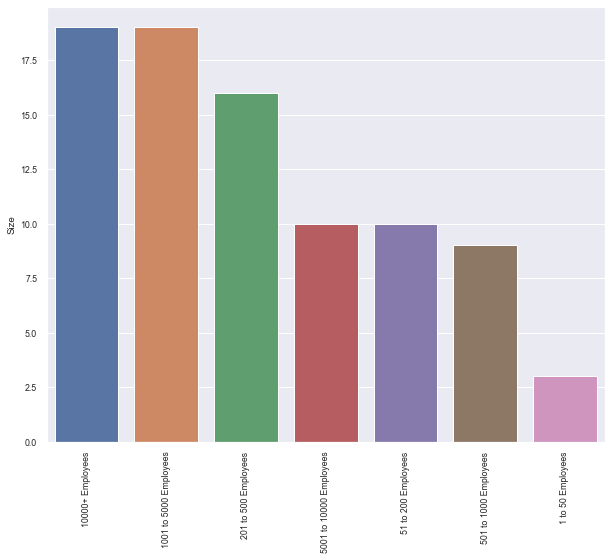

The total groupings for Type of ownership is 8


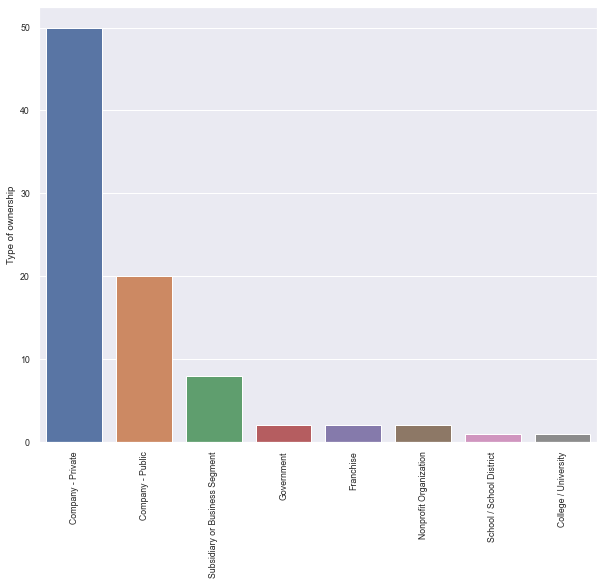

The total groupings for Industry is 27


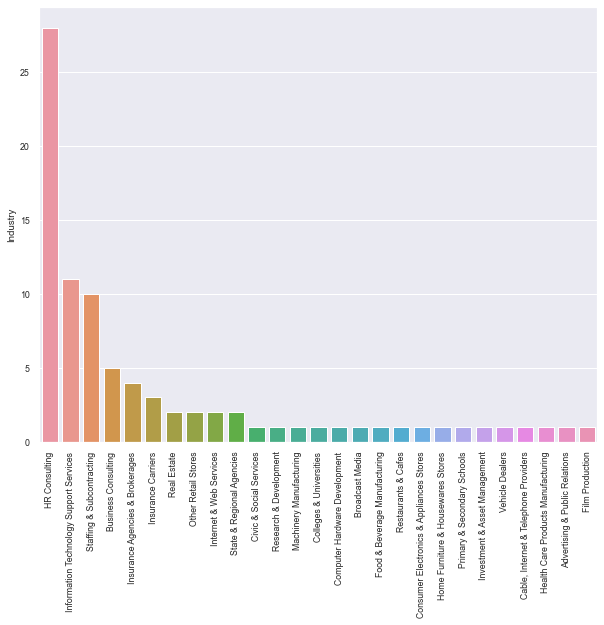

The total groupings for Sector is 14


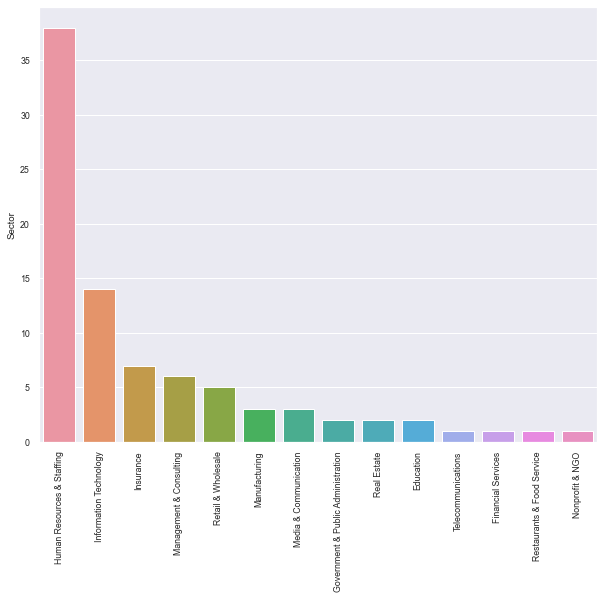

The total groupings for Revenue is 13


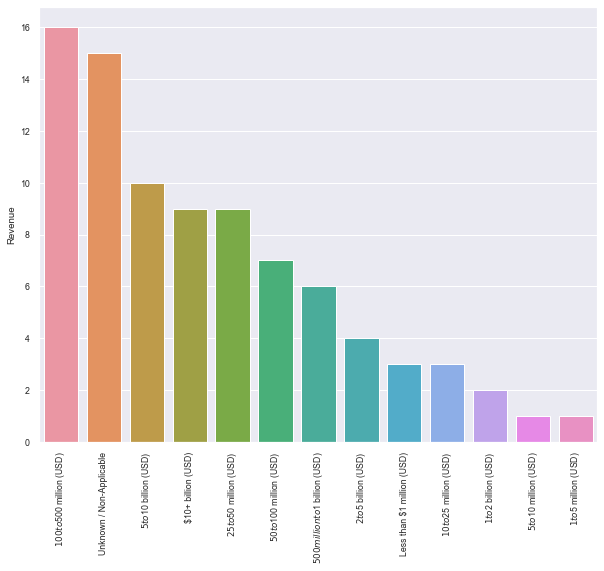

The total groupings for City is 54


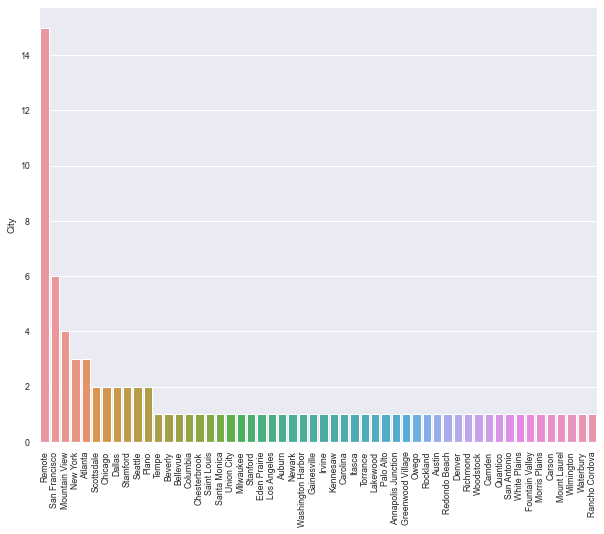

The total groupings for State is 23


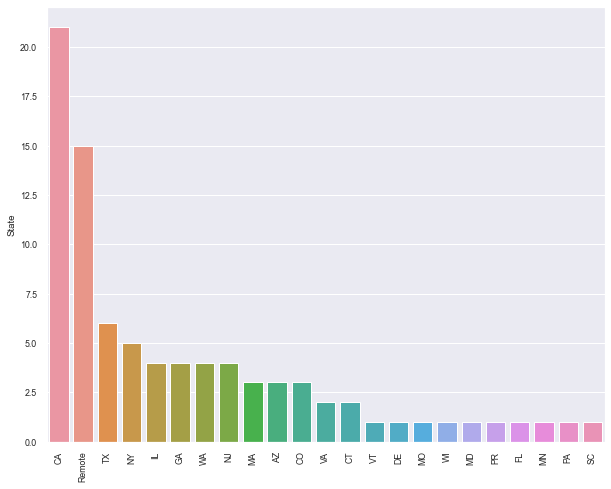

The total groupings for Seniority Level is 4


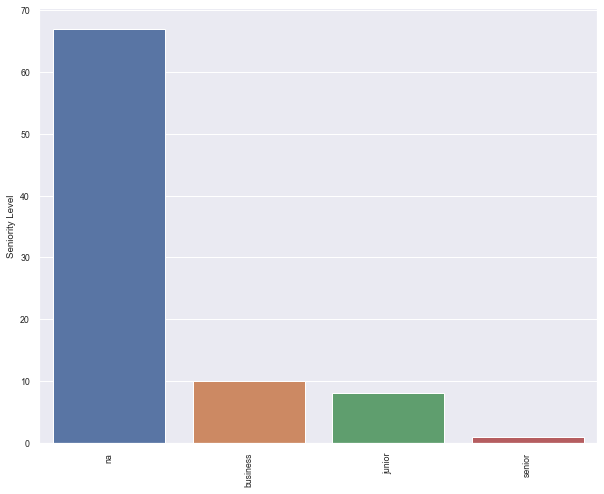

In [37]:
sns.set(rc={'figure.figsize':(10,8)},font_scale=0.8)
for i in df_cats.columns:
    cat_num = df_cats[i].value_counts()
    print("The total groupings for %s is %d" % (i, len(cat_num)))
    graph = sns.barplot(x=cat_num.index, y=cat_num, data=df_cats)
    graph.set_xticklabels(graph.get_xticklabels(), rotation=90)
    #insert line to save strings here
    plt.show()
    

Let's walk through each graph and see if there are any stand out insights at a glance:
* **Size** - The largest company bin (10000+ employeers) comprises the bulk of the postings, followed by small enterprises (200-500 employees)
* **Ownership** - Private and publicly held companies have the highest postings for data analysts. Surprisingly, government and university jobs dont have very many postings. For universities this is especially surprising, as there are ample opportunities to look at large data sets to determine student success or happiness. 
* **Industry** - Human Resources, Insurance, Healthcare and Business consulting top the list for industries with data analyst job postings on Glassdoor. Surprisingly, biotech is at the low end of the list. Maybe this is due to data analytics being lumped in with the duties of a research scientist. One thing to note is the **broad** range of industries needing data analyst services. Even in this small sample set, **37** different represented industries are observed!
* **Revenue** The Revenue ranges given are roughly equivalent to each other in terms of representation. A good portion of the postings did not have an annual revenue, so perhaps supplimenting this data with a seperate datasource would be helpful if we wish to analyze based off revenue further. 
* **Location - city** - Large cities hold the most postings for data analysts, with New York topping the list. Surprisingly, remote jobs are the largest posting type! Good for people who have the skills but don't wish to change locations. 
* **Location - state** - Again, the bulk of locations are remote, with New York state holding the most postings after that. I was surprised to see California and Washington not represented more heavily, but perhaps those postings were listed as remote since they have more experience with that work being farmed out. A question to follow up with later. 
* **Seniority level** - Junior and senior positions based on text scraping are equally represented, but I need to go back and tweek the code to strip out I/II/III from the data and bin them into the appropriate seniority levels. As it stands, I won't be able to get very much out of this. 

In [38]:
df.columns

Index(['Job Title', 'Salary Minimum', 'Salary Maximum', 'Salary Average',
       'Rating', 'Company Name', 'Location', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Average Hourly Rate', 'City', 'State', 'Company Age (years)',
       'Title Grouping', 'Seniority Level'],
      dtype='object')

In [39]:
pd.pivot_table(df, index = 'Title Grouping')

,Average Hourly Rate,Company Age (years),Founded,Rating,Salary Average,Salary Maximum,Salary Minimum
Title Grouping,,,,,,,
analyst,0.329412,38.964706,1983.035294,3.902353,77.543071,92.752471,65.344471
specialist,0.000000,76.000000,1946.000000,3.500000,46.279000,64.000000,34.000000


In [40]:
df["Job Title"].value_counts().head(30)

Data Analyst                                                    30
Business Analyst                                                 3
Data Analyst Specialist                                          2
Junior Data Analyst/Data Steward                                 2
Junior Data Analyst                                              2
Saybrus Partners- Data Reporting Analyst                         2
Jr. Data Analyst                                                 2
Research Data Analyst I - JC-310561                              1
Junior Business Analyst                                          1
BUSINESS DATA ANALYST                                            1
Data Analyst : 320637                                            1
Cybersecurity Analyst (Remote)                                   1
Data Analyst, Retirement Programs                                1
Business Analyst Work                                            1
Business Data Analyst                                         

In [42]:
pd.set_option('display.max_rows', None)
pd.pivot_table(df, index = ["Job Title", "Seniority Level"], values = 'Salary Average').sort_values('Salary Average', ascending = False)

,,Salary Average
Job Title,Seniority Level,
Data Analyst : 320637,na,135.200000
Financial Data Analyst,na,110.240000
Cybersecurity Analyst (Remote),na,105.000000
Business Analyst,business,98.506667
Exciting Data Analyst Job - Direct Hire - Remote,na,95.000000
Business Data Analyst,business,93.305000
Senior Data Analyst (Local or Remote),senior,92.885000
Assoc Data Analyst,na,88.698000
Part-Time Healthcare Data Analyst (60% Remote),na,87.360000


At this time, I need to go back through and rebinn the titles, including Entry-level = junior, Master = senior, etc. 

Let's take a look at the average salaries by State/City for these roles. I would hypothesize the costal states/cities would have the larger average salaries, but that will be affected by the types of jobs being posted in each state.

In [43]:
pd.pivot_table(df, index = 'State', values = ['Salary Average']).sort_values('Salary Average', ascending = False)

,Salary Average
State,
MD,174.100000
DE,131.040000
WI,110.240000
PR,95.000000
MO,87.360000
CT,85.506500
GA,82.979750
WA,81.121750
CA,81.037524


Surprisingly, Georgia tops the list of average salaries, with California close behind. Utah takes the third spot. Michigan, Maryland and Montana are all low on the list. Perhaps this is due to the types of jobs being offered in these states. Let's make a pivot table showing the job titles and how many of those jobs are being offered. 

In [44]:
pd.pivot_table(df, index = ['State', 'Job Title'], values = 'Salary Average', aggfunc = 'count').sort_values('State', ascending = False)

Salary Average
State  Job Title                                                         
WI     Financial Data Analyst                                           1
WA     Reporting Data Analyst                                           1
       Data Visualization Analyst                                       1
       Data Analyst                                                     2
VT     Data Analyst                                                     1
VA     Data Analyst Supporting the FBI                                  1
       Data Analyst                                                     1
TX     Data Analyst                                                     1
       (REMOTE) AUSTIN based Data Analyst                               1
       Business Data Analyst - Onboarding                               1
       Junior Data Analyst                                              1
       Jr. Data Analyst                                                 1
       REMOTE - SAS Data Analyst                                        1
SC     Data Analyst                                                     1
Remote Data Analyst Associate                                           1
       Analyst, Product Research, Telematics & Mobilit...               1
       Data Analyst                                                     5
       Data Analyst (Business Intelligence)                             1
       Data Analyst - Programmatic                                      1
       Data Reporting Analyst                                           1
       Data Analyst II                                                  1
       Data Analyst/Modeler                                             1
       Retail Floor Plan Analyst Planograms                             1
       Saybrus Partners- Data Reporting Analyst                         2
PR     Exciting Data Analyst Job - Direct Hire - Remote                 1
PA     Data Analyst Specialist                                          1
NY     REMOTE Business Analyst - $75k (Data Migration,...               1
       Data Analyst, Retirement Programs                                1
       Data Analyst, Research Outcomes                                  1
       Data Analyst                                                     2
NJ     Jr. Data Analyst                                                 1
       Jr Business Analyst                                              1
       Data Analyst                                                     2
MO     Data Analyst                                                     1
MN     Data Analyst                                                     1
MD     Data Analyst                                                     1
MA     Clinical Data Management Analyst (Remote)                        1
       BUSINESS DATA ANALYST                                            1
       Junior Data Analyst                                              1
IL     eCommerce Product Data Analyst - Remote                          1
       Reporting Analyst                                                1
       Part-Time Healthcare Data Analyst (60% Remote)                   1
       Data Analyst                                                     1
GA     Junior Business Analyst                                          1
       Data and Reporting Analyst                                       1
       Data Analyst                                                     1
       Cybersecurity Analyst (Remote)                                   1
FL     Data Analyst                                                     1
DE     Business Analyst                                                 1
CT     Data Analyst                                                     1
       Business Analyst                                                 1
CO     Data Analyst I                                                   1
       Data Analyst                                            

This gives us some insights. Utah is only hiring two jobs, both at senior pay levels. Georgia is hiring a large amount of cybersecurity data analysts. Meanwhile, Michigan, Montana and Maryland are largely hiring junior positions. This does give us some insights, such as senior level and cybersecurity analysts potentially earning more than general analysts. 

Let's go ahead and loop through all the data in a pivot table to see if anything stands out.

In [23]:
df.columns

Index(['Job Title', 'Salary Minimum', 'Salary Maximum', 'Salary Average',
       'Rating', 'Company Name', 'Location', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Average Hourly Rate', 'Converted Salary', 'City', 'State',
       'Company Age (years)', 'Title Grouping', 'Seniority Level'],
      dtype='object')

In [46]:
df_pivots=df[['Job Title','Salary Minimum','Salary Maximum','Salary Average','Rating','Company Name','Location','Size','Founded','Type of ownership','Industry','Sector','Revenue','Average Hourly Rate', 'City', 'State','Company Age (years)','Title Grouping','Seniority Level','Salary Average']]
pd.set_option('display.max_rows', None)
for i in df_pivots.columns:
    print(i) # get the column name
    if i == 'Salary Average':
        pass
    else:
        table = pd.pivot_table(df_pivots, index = i, values='Salary Average').sort_values(i, ascending = False)
        print(table)

Job Title
                                                    Salary Average  \
Job Title                                                            
eCommerce Product Data Analyst - Remote                  52.348000   
Senior Data Analyst (Local or Remote)                    92.885000   
Saybrus Partners- Data Reporting Analyst                 54.815000   
Retail Floor Plan Analyst Planograms                     54.080000   
Research Data Analyst I - JC-310561                      58.110000   
Research Data Analyst                                    64.978000   
Reporting Data Analyst                                   87.050000   
Reporting Analyst                                        66.560000   
Remote EDI Analyst Contractor                            66.560000   
REMOTE Business Analyst - $75k (Data Migration,...       62.500000   
REMOTE - SAS Data Analyst                                74.225000   
Quality Data Analyst                                     87.235000   
Part-Time 

A ton of quick insights from this pivot table dump. Unsurprisingly, senior analysts make significantly more than juniors ($102k vs $69k average). Business/Cybersecurity analysts top the list of salary ranges. Smaller companies (defined as 1-200, 500-5000 employees) pay on the lower end of salaries, with 200-500 employee companies being the outlier at the higher end. It would be interesting to see if 200-500 employee companies are requesting more senior/cybersecurity jobs, which skew the average up. Public companies and government jobs pay the highst on average, with university/non-provig being the lowest. Security and HR are on the higher end as well, with biotech, grocery and universities being the bototm. Lastly, the Real Estate, IT and Government sectors are the high end of salaries.

The data bins could us esome work, specifically the title grouping. It would also be nice to have a large dataset to take care of data skewing (such as having states with 1 high job posting skewing results). I could clean the data further by removing states with a single job count ooff the lst. For now, this will work as a launchpad to make some quick ML models for correlation predictions. 